# Adam 的 Gluon 实现

在 Gluon 里，使用 Adadelta 很容易，我们无需重新实现该算法。

首先，导入本节中实验所需的包或模块。

In [1]:
import sys
sys.path.append('..')
import gluonbook as gb
from mxnet import gluon, init, nd
from mxnet.gluon import nn

下面生成实验数据集并定义线性回归模型。

In [2]:
# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

# 线性回归模型。
net = nn.Sequential()
net.add(nn.Dense(1))

我们可以在 Trainer 中定义优化算法名称 `adam` 并定义初始学习率。以下实验重现了 [“Adam”](adam.md) 一节中实验结果。

w: 
[[ 1.99884164 -3.40041995]]
<NDArray 1x2 @cpu(0)> 
b: 
[ 4.20041609]
<NDArray 1 @cpu(0)> 



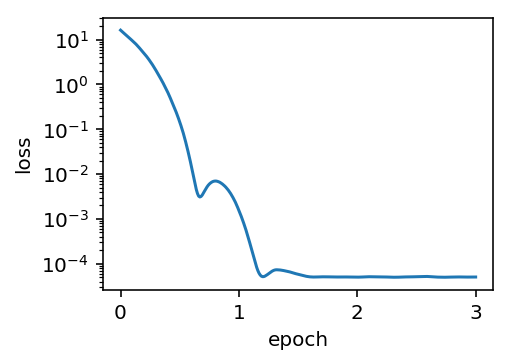

In [3]:
net.initialize(init.Normal(sigma=0.01), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': 0.1})
gb.optimize(batch_size=10, trainer=trainer, num_epochs=3, decay_epoch=None,
            log_interval=10, features=features, labels=labels, net=net)

## 小结

* 使用 Gluon 的 `Trainer` 可以方便地使用 Adam。


## 练习

* 总结本章各个优化算法的异同。
* 回顾前面几章中你感兴趣的模型，将训练部分的优化算法替换成其他算法，观察并分析实验现象。


## 扫码直达 [ 讨论区 ](https://discuss.gluon.ai/t/topic/2280)


![](../img/qr_adam-gluon.svg)


## 本章回顾


> 梯度下降可沉甸，  随机降低方差难。

> 引入动量别弯慢，  Adagrad 梯方贪。

> Adadelta 学率换， RMSProp 梯方权。

> Adam 动量 RMS 伴，  优化还需己调参。


注释：

* 梯方：梯度按元素平方。
* 贪：因贪婪故而不断累加。
* 学率：学习率。
* 换：这个参数被替换掉。
* 权：指数加权移动平均。